In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
X = df[['highway-mpg']]
y = df['price']

In [4]:
# import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# tạo đa thức bậc 2
pf = PolynomialFeatures(degree=2)

In [6]:
X_pf = pf.fit_transform(X)

In [7]:
X.shape, X_pf.shape

((201, 1), (201, 3))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, random_state=0, test_size=0.2) # -> 80:20

In [9]:
# khởi tạo model
model = LinearRegression()

In [10]:
#huấn luyện model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
yhat_train = model.predict(X_train)

In [12]:
yhat_train[0:5]

array([18153.55147706, 11791.11149207,  9027.76408284, 11791.11149207,
        5872.83157336])

In [13]:
y_train[0:5]

66     28176.0
26      8558.0
113    17950.0
168    17669.0
63     18344.0
Name: price, dtype: float64

In [14]:
yhat_test = model.predict(X_test)

In [16]:
# tính R^2
print('Full Dataset R-square:', model.score(X_pf, y))
print('Train Dataset R-square:', model.score(X_train, y_train))
print('Test Dataset R-square:', model.score(X_test, y_test))

Full Dataset R-square: 0.6514680420563108
Train Dataset R-square: 0.6694447063751235
Test Dataset R-square: 0.5893866960420008


In [17]:
# tính MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
print('Train Dataset MSE:', mean_squared_error(y_train, yhat_train))
print('Test Dataset MSE:', mean_squared_error(y_test, yhat_test))

Train Dataset MSE: 19542271.644623287
Test Dataset MSE: 31112289.88184675


In [19]:
print('Train Dataset MAE:', mean_absolute_error(y_train, yhat_train))
print('Test Dataset MAE:', mean_absolute_error(y_test, yhat_test))

Train Dataset MAE: 2992.833383021634
Test Dataset MAE: 3822.6696080592797


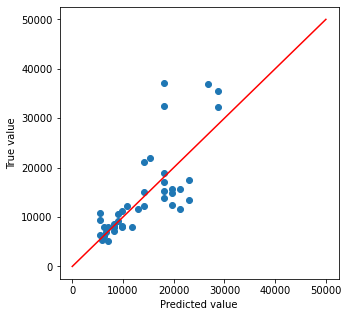

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.plot([0, 50000], [0, 50000], 'k-', color='r')
plt.show()

In [21]:
a = model.intercept_

In [22]:
b = model.coef_

In [23]:
a

82906.89458214882

In [24]:
b

array([    0.        , -3688.17183021,    43.92152424])